# Mengecek keseragaman *time stamp* data

Untuk contoh kasus kali ini, data yang diambil memiliki *framerate* sebesar 120 fps, artinya setiap frame diambil dengan waktu paparan 1/120 detik atau sekitar 0,008 detik (8 ms). Jika *time stamp*-nya bisa diandalkan, maka seharusnya selisih waktu setiap frame berada di angka $\sim$8 ms

## Buat *dataframe* dari data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set(font_scale=1.5)
# sns.set_style("darkgrid")

# plt.rcParams['font.family'] = 'Serif'
# plt.style.use('ggplot')
plt.style.use(['science', 'notebook', 'grid'])

In [2]:
df = pd.read_csv("jabbah-20211221-dualaperture.csv", sep=',')
# df = pd.read_csv("hd211038-b.csv", sep=',')

In [3]:
df.head()

,FrameNum,timeInfo,signal-Jabbah,signal-ref,appsum-Jabbah,avgbkg-Jabbah,stdbkg-Jabbah,nmaskpx-Jabbah,maxpx-Jabbah,xcentroid-Jabbah,ycentroid-Jabbah,appsum-ref,avgbkg-ref,stdbkg-ref,nmaskpx-ref,maxpx-ref,xcentroid-ref,ycentroid-ref
0,4400.0,[17:17:58.7247828],2874.0,46.0,4719.0,32.95,4.60,56,255,314.34,354.45,658.0,16.55,3.16,-37,31,526.0,65.0
1,4401.0,[17:17:58.7328392],2845.0,45.0,4699.0,33.11,4.68,56,255,314.50,354.29,652.0,16.41,3.20,-37,33,526.0,65.0
2,4402.0,[17:17:58.7408955],2274.0,20.0,3992.0,33.04,4.66,52,255,314.31,354.60,636.0,16.65,3.15,-37,35,526.0,65.0
3,4403.0,[17:17:58.7489519],2336.0,83.0,3886.0,32.98,4.54,47,255,314.04,354.81,692.0,16.47,3.27,-37,32,526.0,65.0
4,4404.0,[17:17:58.7570083],2162.0,202.0,3637.0,32.79,4.59,45,255,313.87,354.71,398.0,16.29,3.23,12,55,529.5,65.5


Kolom `timeInfo` masih memiliki karakter kurung siku. Hilangkan karakter tersebut dan ubah tipe kolom menjadi `dateTime`.

In [4]:
# hilangkan karakter [ dan ] dari data
df['timeInfo'] = df['timeInfo'].map((lambda x: x.lstrip('[').rstrip(']')))

# ubah ke format waktu dan ambil tanggal dan jamnya
df['timeInfo'] = pd.to_datetime(df['timeInfo'])
# df['timeInfo'] = pd.to_datetime(df['timeInfo']).dt.time

df.head()

,FrameNum,timeInfo,signal-Jabbah,signal-ref,appsum-Jabbah,avgbkg-Jabbah,stdbkg-Jabbah,nmaskpx-Jabbah,maxpx-Jabbah,xcentroid-Jabbah,ycentroid-Jabbah,appsum-ref,avgbkg-ref,stdbkg-ref,nmaskpx-ref,maxpx-ref,xcentroid-ref,ycentroid-ref
0,4400.0,2022-06-16 17:17:58.724782,2874.0,46.0,4719.0,32.95,4.60,56,255,314.34,354.45,658.0,16.55,3.16,-37,31,526.0,65.0
1,4401.0,2022-06-16 17:17:58.732839,2845.0,45.0,4699.0,33.11,4.68,56,255,314.50,354.29,652.0,16.41,3.20,-37,33,526.0,65.0
2,4402.0,2022-06-16 17:17:58.740895,2274.0,20.0,3992.0,33.04,4.66,52,255,314.31,354.60,636.0,16.65,3.15,-37,35,526.0,65.0
3,4403.0,2022-06-16 17:17:58.748951,2336.0,83.0,3886.0,32.98,4.54,47,255,314.04,354.81,692.0,16.47,3.27,-37,32,526.0,65.0
4,4404.0,2022-06-16 17:17:58.757008,2162.0,202.0,3637.0,32.79,4.59,45,255,313.87,354.71,398.0,16.29,3.23,12,55,529.5,65.5


Buat *dataframe* baru dengan penamaan kolom baru untuk kolom-kolom yang ditinjau (supaya tidak terlihat *cluttered*)

In [5]:
data = df[['FrameNum','timeInfo','signal-Jabbah']]
# data = df[['FrameNum','timeInfo','signal-obj']]
data.columns = ['Frame','Time', 'Value']
data.head()

,Frame,Time,Value
0,4400.0,2022-06-16 17:17:58.724782,2874.0
1,4401.0,2022-06-16 17:17:58.732839,2845.0
2,4402.0,2022-06-16 17:17:58.740895,2274.0
3,4403.0,2022-06-16 17:17:58.748951,2336.0
4,4404.0,2022-06-16 17:17:58.757008,2162.0


In [6]:
data['Time'].loc[0:12]

0    2022-06-16 17:17:58.724782
1    2022-06-16 17:17:58.732839
2    2022-06-16 17:17:58.740895
3    2022-06-16 17:17:58.748951
4    2022-06-16 17:17:58.757008
5    2022-06-16 17:17:58.765064
6    2022-06-16 17:17:58.773121
7    2022-06-16 17:17:58.781177
8    2022-06-16 17:17:58.789233
9    2022-06-16 17:17:58.797290
10   2022-06-16 17:17:58.805346
11   2022-06-16 17:17:58.813402
12   2022-06-16 17:17:58.821459
Name: Time, dtype: datetime64[ns]

Text(0.5, 0, 'UTC (mm:ss.ssssss)')

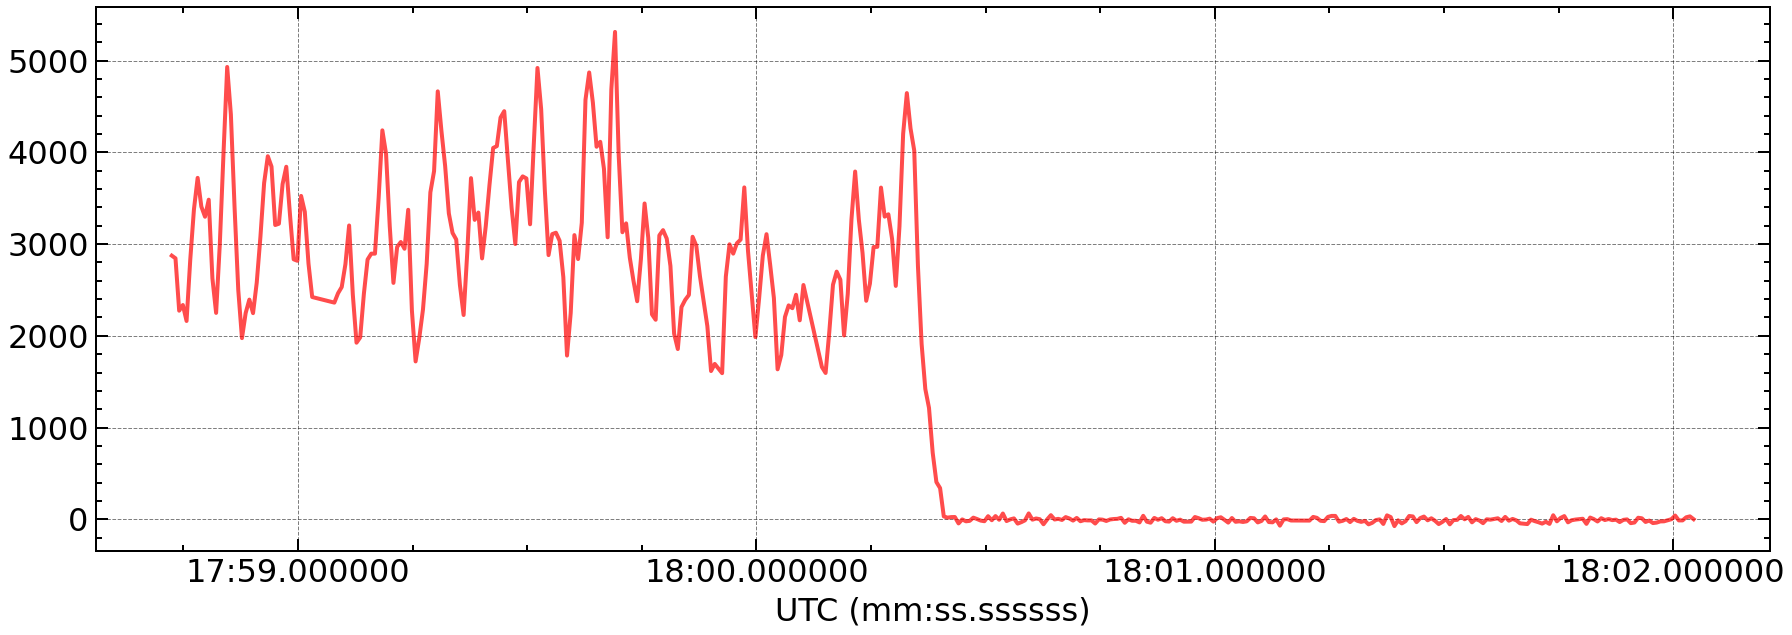

In [7]:
# from matplotlib.ticker import FormatStrFormatter

# plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(data['Time'], data['Value'], 'r-', alpha=0.7)
ax.set_xlabel('UTC (mm:ss.ssssss)')
# ax.set_xlim()

## Cek *timestamp*

In [8]:
selisih = data['Time'].diff()
selisih_drop = selisih.drop([0])
selisih_drop.value_counts()

0 days 00:00:00.008056    244
0 days 00:00:00.008057    149
0 days 00:00:00.040282      3
0 days 00:00:00.008177      3
0 days 00:00:00.008178      1
Name: Time, dtype: int64

<AxesSubplot:>

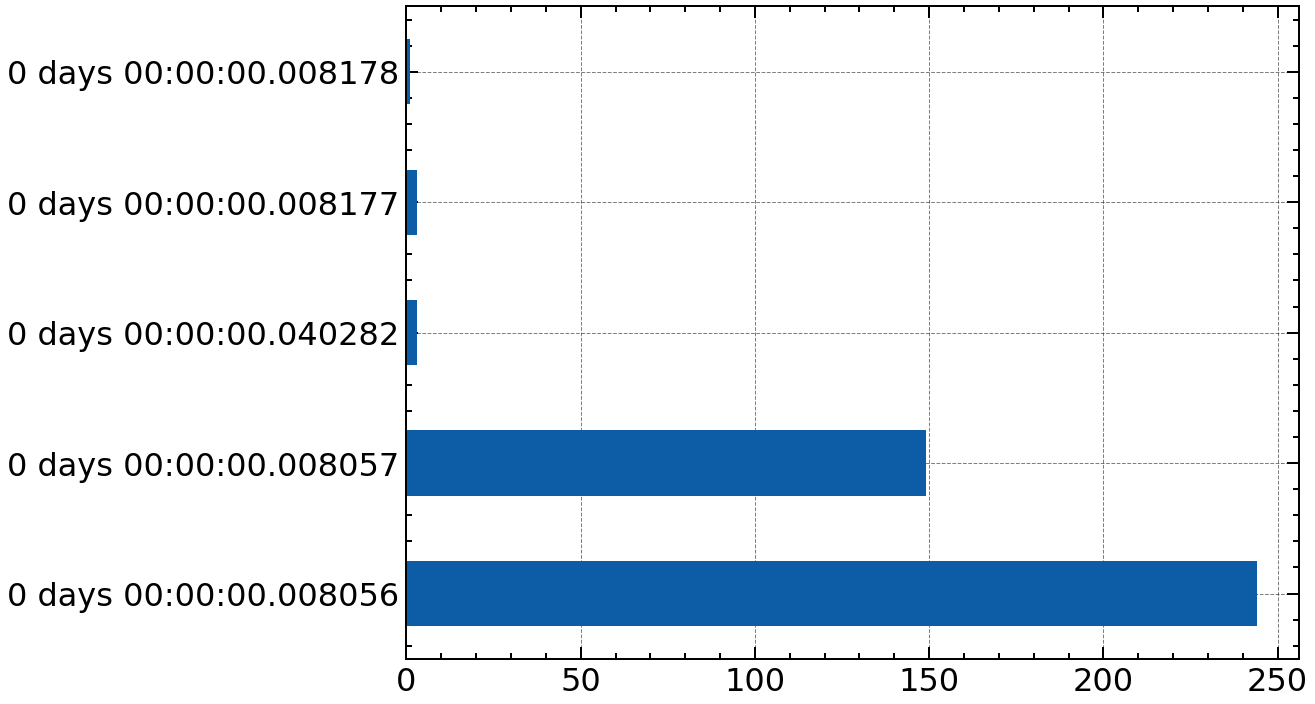

In [9]:
selisih_drop.value_counts().plot(kind='barh')

In [10]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Jun 16 2022

Python implementation: CPython
Python version       : 3.10.5
IPython version      : 8.4.0

matplotlib: 3.5.2
pandas    : 1.4.2

Watermark: 2.3.1

